<h2 style="text-align: center"> <b>  Математическая статистика  </b> </h2>

Примеры и определения взяты из источников:
* Сборник задач по математике т.4 под редакцией А.В.Ефимова и А.С.Попелова (1)
* Schaum's Outline of Statistics 3rd Edition by Murray R Spiegel, Larry J Stephens (2)

В Python есть несколько библиотек, необходимых для решения подобных задач. В зависимотси от конкретной задачи, целесообразно использовать одну из них: <br>
$\textbf{numpy}$ - пожалуй, основная библиотека для работы с числовыми данными в python. Написана на C и оптимизирована для работы с многомерными массивами, что обеспечивает достаточно высокое быстродействие; <br>
$\textbf{pandas}$ - преднанзначена для задач аналитики. Позволят строить красивые таблицы, использовать SQL подобные операции. Pandas написана поверх numpy на python и, как следствие, имеет более низкую производительность; <br>
Раз уж мы решаем задачи статистики, стоит упомянуть $\textbf{statsmodels}$  - реализация статистических моделей. Написана поверх numpy и scipy. Результаты работы в statsmodels похожи на аналогичные вычисления в языке R; <br>
$\textbf{scipy}$ - библиотека всевозможных научных расчетов. Написана на Python,С,С++.

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import mode
from statsmodels.distributions.empirical_distribution import ECDF
from collections import Counter
from numpy import square
from typing import List
import matplotlib.pyplot as plt

####  Выборка и способы ее представления
*Вариационным рядом выборки* $x_{1},x_{2},...,x_{n}$ называется способ её представления, при котором элементы упорядочиваются по её величине, т.е. записываются в виде последовательности $x^{(1)},x^{(2)},...,x^{(n)}$, где $x^{(1)} \leq x^{(2)} \leq...\leq x^{(n)}$. Разность между максимальным и минимальным элементами выборки $x^{(n)}-x^{(1)}=\omega$ называется *размахом* выборки.<br>
*Статистическим рядом* называется последовательность пар ($z_{i},n_{i}$). Обычно, статистический рад записывается в виде таблицы, первая строка которой содержит элементы $z_{i}$, а вторая - их частоты.

Пример 1.1. Записать в виде вариационного и статистического рядов выборку 5,3,7,10,5,5,2,10,7,2,7,7,4,2,4. Определить размах выборки.

<div style="text-align: right"> 1, гл. 19.1 </div>

In [2]:
Arr = np.array([5,3,7,10,5,5,2,10,7,2,7,7,4,2,4])

In [3]:
# Решение с помощью numpy

In [4]:
# Размах
w = Arr.max() - Arr.min()

In [5]:
# Вариационный ряд
# sort - остортирует элементы в порядке возрастания, т.е. получим вариационный ряд
Arr.sort()

In [6]:
Arr

array([ 2,  2,  2,  3,  4,  4,  5,  5,  5,  7,  7,  7,  7, 10, 10])

In [7]:
# Статистический ряд
# z - уникальные числа, n - частоты
z,n = np.unique(Arr, return_counts=True)
S = np.vstack((z,n))

In [8]:
S

array([[ 2,  3,  4,  5,  7, 10],
       [ 3,  1,  2,  3,  4,  2]])

Проверим, что 
<p style="text-align: center"> <b>  $\sum_{n=1}^{k}n_{i}=n,$ </b> </p>
где k-число различных чисел в выборке.

In [9]:
n.sum() == len(Arr)

True

In [10]:
# Решим то же самое и сипользованием pandas

In [11]:
df = pd.DataFrame(Arr, columns=['x'])

In [12]:
w = df.x.max() - df.x.min()

In [13]:
df.x.sort_values().values

array([ 2,  2,  2,  3,  4,  4,  5,  5,  5,  7,  7,  7,  7, 10, 10])

In [14]:
s = df.x.value_counts().sort_index()

In [15]:
s = pd.DataFrame({"z": s.index.values, "n":s.values})

In [16]:
s

,z,n
0,2,3
1,3,1
2,4,2
3,5,3
4,7,4
5,10,2


In [17]:
s.style.hide_index()

z,n
2,3
3,1
4,2
5,3
7,4
10,2


In [18]:
s.T

,0,1,2,3,4,5
z,2,3,4,5,7,10
n,3,1,2,3,4,2


Пример 1.2. Представить выборку из 55 наблюдений в виде таблицы частот, используя 7 нтервалов группировки. Выборока:
<p style="text-align: center"> 
              20.3, 15.4, 17.2, 19.2, 23.3, 18.1, 21.9,<br>
              15.3, 16.8, 13.2, 20.4, 16.5, 19.7, 20.5,<br>
              14.3, 20.1, 16.8, 14.7, 20.8, 19.5, 15.3,<br>
              19.3, 17.8, 16.2, 15.7, 22.8, 21.9, 12.5,<br>
              10.1, 21.1, 18.3, 14.7, 14.5, 18.1, 18.4,<br>
              13.9, 19.1, 18.5, 20.2, 23.8, 16.7, 20.4,<br>
              19.5, 17.2, 19.6, 17.8, 21.3, 17.5, 19.4,<br>
              17.8, 13.5, 17.8, 11.8, 18.6, 19.1 </p>

При большом объеме выборки её элементы объединяют в гурпы (разряды), представляя результаты опытов в виде  *группированого статистического ряда*. Для этого интервал, содержащий все элементы выборки, разбивается на k интервалов. Инервалы имеют длину *b*$\approx\frac{\omega}{k}$. После того, как частичные интервалы выбраны, определяют частоты - количество $n_{i}$ элементов выборки, попавших в i-й интервал. Полученный статистический ряд в верхней строке содержит середины $z_{i}$ интервалов группировки, а в нижней частоты $n_{i}$ (i=1,2,...,k).<br>
Наряду с частотами одновременно подсчитываются также накопленные частоты  $\sum_{j=1}^{i}n_{j}$, относительные частоты $\frac{n_{i}}{n}$. Полученные результаты сводятся в таблицу, называемую *таблицей частот группированной выборки*.
<div style="text-align: right"> 1, гл. 19.1 </div>

Сразу отметим, что в книге есть опечатка, и количество элементов на интервале 18-20 и 20-22 отличается на 1. Будем использовать приведенную выборку, но графики будут слегка отличаться от приведенных в книге.

In [19]:
# Решать эту задачу на numpy нет особого смысла, т.к. группированный статистический ряд 
# предназначен для анализа человеком, чтоб на него посмотреть глазами. 
# А это типичная задача pandas.

In [20]:
M = np.array([20.3, 15.4, 17.2, 19.2, 23.3, 18.1, 21.9,
              15.3, 16.8, 13.2, 20.4, 16.5, 19.7, 20.5,
              14.3, 20.1, 16.8, 14.7, 20.8, 19.5, 15.3,
              19.3, 17.8, 16.2, 15.7, 22.8, 21.9, 12.5,
              10.1, 21.1, 18.3, 14.7, 14.5, 18.1, 18.4,
              13.9, 19.1, 18.5, 20.2, 23.8, 16.7, 20.4,
              19.5, 17.2, 19.6, 17.8, 21.3, 17.5, 19.4,
              17.8, 13.5, 17.8, 11.8, 18.6, 19.1])

In [21]:
def freq_grouped_values(M: np.array, n_intervals: int) -> pd.DataFrame:
    """
    Таблица частот группированной выборки
    """
    df = pd.DataFrame(M)
    start = round(min(M))
    w = max(M)-min(M)
    b = round(w/n_intervals)
    end = round(max(M))
    L = len(M)
    df = df.groupby(pd.cut(M, np.arange(start,end+b,b))).agg(['count'])
    df.columns = df.columns.get_level_values(0)
    df.columns = ['Freq']
    mid_points = np.arange(start+b/2,end,b)
    df['Mid_points'] = mid_points
    df['Cum_freq'] = df['Freq'].cumsum()
    df['Rel_freq'] = df['Freq'] / L
    df['Rel_c_freq'] = df['Cum_freq'] / L
    df = df[['Mid_points','Freq','Cum_freq','Rel_freq','Rel_c_freq']]
    return df.round(4)

In [22]:
# значеия понадобятся дальше
n_intervals = 7
w = max(M)-min(M)
b = round(w/n_intervals)
start = round(min(M))
end = round(max(M))

In [23]:
T = freq_grouped_values(M,n_intervals)

In [24]:
T

,Mid_points,Freq,Cum_freq,Rel_freq,Rel_c_freq
"(10.0, 12.0]",11.0,2,2,0.0364,0.0364
"(12.0, 14.0]",13.0,4,6,0.0727,0.1091
"(14.0, 16.0]",15.0,8,14,0.1455,0.2545
"(16.0, 18.0]",17.0,12,26,0.2182,0.4727
"(18.0, 20.0]",19.0,15,41,0.2727,0.7455
"(20.0, 22.0]",21.0,11,52,0.2000,0.9455
"(22.0, 24.0]",23.0,3,55,0.0545,1.0000


Пусть ($x_{1},x_{2},...,x_{n}$) - выборка из генеральной совокупности с функцией распределения $F_{x}(x)$. *Распределением выборки* называется распределение дискретной случайной величины, принимающей значения распределения $x_{1},x_{2},...,x_{n}$ с вероятностями $\frac{1}{n}$. Соответствующая функция распределения называется *эмперической (выборочной) функцией распределения* и обозначается $F_{n}^{*}(x)$.

Эмперическая функция распределения определяется по значениям накопленных частот соотношением
<p style="text-align: center"> <b>  $F_{n}^{*}(x)=\frac{1}{n}\sum_{z_{i}<x}^{}n_{i},$ </b> </p>
суммируются частоты тех элементо выборки, для которых выполняется неравенство $z_{i}<x$.

*Гистограммой частот* группированной выборки называется кусочно-постоянная функция, постоянная на интервалах группировки и принимающая на каждом их них значения $\frac{n_{i}}{b}$, i=1.2...k соответственно. Аналогично определяется гитограмма относительных частот.

*Полигоном частот* называется ломаная с вершинами в точках ($z_{i},\frac{n_{i}}{b}$), i=1.2...k, а полигоном относительных частот - ломаная с вершинами в точках ($z_{i},\frac{n_{i}}{nb}$), i=1.2...k.

Пример 1.3. Построить гистограмму и полигон частот, а также график эмпирической функции распределения группированной выборки из примера 2.
<div style="text-align: right"> 1, гл. 19.1 </div>

In [25]:
# Реализуем функцию эмпирического распределения в лоб - для наглядности

In [26]:
def empirical_distribution(M:np.array,T:pd.DataFrame)->np.array:
    """
    Эмперическая функция распределения
    """
    F = []
    L = len(M)
    for x in M:
        f = 0
        for i,row in T.iterrows():
            z = row.Mid_points
            n = row.Freq
            if z < x:
                f+=n
        F.append(f/L)
    return np.unique(np.array(F))

In [27]:
F = empirical_distribution(M,T)

In [28]:
F

array([0.        , 0.03636364, 0.10909091, 0.25454545, 0.47272727,
       0.74545455, 0.94545455, 1.        ])

In [29]:
# В англоязычной литературе эмперическая функция распределения известна как 
# empirical cumulative distribution function - ECDF. Её реализация есть в библиотеке statsmodels.

In [30]:
# ECDF принимает на вход массив, а возвращает функцию, которая показывает значение функции F(x)
ecdf = ECDF(M)

In [31]:
F_ = [round(ecdf(x),4) for x in np.arange(start,end+b,b)]
F = F.round(4)

In [32]:
# Проверим, что наша реализация работает корректно

In [33]:
F == F_

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [34]:
# Построим указанные графики

Text(0.5, 1.0, 'Накопленные частоты')

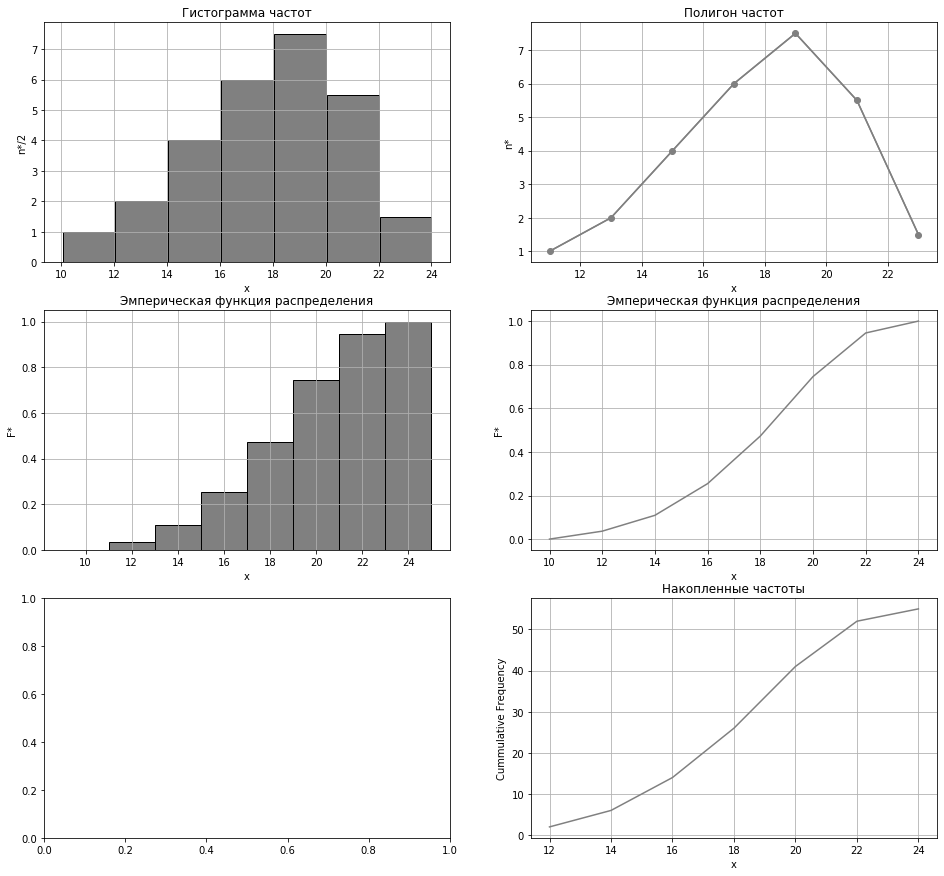

In [35]:
fig, axes = plt.subplots(3,2, figsize=(16,15))
x = np.arange(start+b,end+b,b)
axes[0,0].bar(x=x, height=T.Freq/b, width=-1.96, linewidth=1, color='grey', edgecolor='black',align='edge')
axes[0,0].grid(True)
axes[0,0].set_xlabel("x")
axes[0,0].set_ylabel("n*/2")
axes[0,0].set_title("Гистограмма частот")

axes[0,1].grid(True)
axes[0,1].plot(T.Mid_points, T.Freq/b, color='grey')
axes[0,1].plot(T.Mid_points, T.Freq/b, marker='o', color='grey', markersize=6)
axes[0,1].set_xlabel("x")
axes[0,1].set_ylabel("n*")
axes[0,1].set_title("Полигон частот")

x = np.arange(start,end+b,b)
axes[1,0].bar(x=x, height=F, width=-2, color='grey', edgecolor='black',align='center')
axes[1,0].grid(True)
axes[1,0].set_xlabel("x")
axes[1,0].set_ylabel("F*")
axes[1,0].set_title("Эмперическая функция распределения")

axes[1,1].plot(x,F, color='grey')
axes[1,1].grid(True)
axes[1,1].set_xlabel("x")
axes[1,1].set_ylabel("F*")
axes[1,1].set_title("Эмперическая функция распределения")

axes[2,1].plot([x.right for x in T.index], T.Cum_freq, color='grey')
axes[2,1].grid(True)
axes[2,1].set_xlabel("x")
axes[2,1].set_ylabel("Cummulative Frequency")
axes[2,1].set_title("Накопленные частоты")

Пример 1.4. Даны оценки 80 студентов по математике. Найти: <br>
1. Наивысший балл. 
2. Низший балл. 
3. Размах. 
4. Оценки 5 лучших студентов. 
5. Оценки 5 худших студентов.
6. Оценку 10-го из лучших.
7. Количество студентов, набравших балл выше 75 (включительно).
8. Количество студентов, набравших балл ниже 85.
9. Процент студентов, набрашвих балл выше 65, но не выше 85. 
10. Балллы, которые не появились совсем. 
<div style="text-align: right"> 2, pr 2.2 </div>

In [36]:
M = np.array([68, 84, 75, 82, 68, 90, 62, 88, 76, 93,
              73, 79, 88, 73, 60, 93, 71, 59, 85, 75,
              61, 65, 75, 87, 74, 62, 95, 78, 63, 72,
              66, 78, 82, 75, 94, 77, 69, 74, 68, 60,
              96, 78, 89, 61, 75, 95, 60, 79, 83, 71,
              79, 62, 67, 97, 78, 85, 76, 65, 71, 75,
              65, 80, 73, 57, 88, 78, 62, 76, 53, 74,
              86, 67, 73, 81, 72, 63, 76, 75, 85, 77])

In [37]:
# 1
print(f"The highest grade: {M.max()}")
# 2
print(f"The lowest grade: {M.min()}")
# 3
print(f"Rage: {M.max()-M.min()}")
M.sort()
# 4
print(f"Grades of 5 higest-ranking students: {M[-5:]}")
# 5
print(f"Grades of 5 lowest-ranking students: {M[0:5]}")
# 6
print(f"The grade of student ranking tenth-highest: {M[-10]}")
# 7
print(f"Number of students who recived gades of 75 o higher: {len(M[M>=75])}")
# 8
print(f"Number of students who recived gades of 75 o higher: {len(M[M<85])}")
# 9
print(f"The percentage of students who recived grades higher than  but not higher than 85: {len(np.where((M>=65) & (M<85))[0])*100/len(M)}%")
# 10
grades = np.arange(52,101)
print(f"The grades tha did not appear at all: {grades[~np.isin(grades, M)]}")

The highest grade: 97
The lowest grade: 53
Rage: 44
Grades of 5 higest-ranking students: [94 95 95 96 97]
Grades of 5 lowest-ranking students: [53 57 59 60 60]
The grade of student ranking tenth-highest: 88
Number of students who recived gades of 75 o higher: 44
Number of students who recived gades of 75 o higher: 63
The percentage of students who recived grades higher than  but not higher than 85: 61.25%
The grades tha did not appear at all: [ 52  54  55  56  58  64  70  91  92  98  99 100]


Пример 1.5. Даны недельные зарплаты 65 сотрудников P&R Company. Определить: <br>
1. Нижнюю границу 6-го класса
2. Верхнюю границу 4-го класса
3. Середнину (class mark) 3-го класса
4. Верхнюю, нижнюю границы 5-го класса
5. Размер интервала (size of interval) 5-го класса.
6. Частоту 3-го класса.
7. Относительную частоту 3-го класса.
8. Интервал класса с ниабольшей частотой (modal class interval).
9. Процент работников, зарабатывабщих меньше 280\$ в неделю.
10. Процент работников, зарабатывабщих меньше 300\$, но больше 260\$ в неделю.

<div style="text-align: right"> 2, pr 2.3 </div>

In [38]:
def get_intervals(start:float,end:float,b:float,step=None)->List[pd.Interval]:
    if step is None:
        step = np.around(b,1)
    return [pd.Interval(left=round(x,3), right=round(x+b,3), closed="both") for x in np.arange(start,end,step)]

In [39]:
def class_bnd(df,n:int,bnd="low"):
    """
    rerurn lower or upper class boundary
    df: pd.DataFrame/list pd.Interval - groupped table
    n: nth class
    bnd: low,up for lower and upper boundary
    """
    if isinstance(df,pd.DataFrame):
        if n == 0 and bnd=="low":
            return df.iloc[0].left - 0.5*np.around(df.iloc[1].left-df.iloc[0].right,2)
        elif n == len(df)-1 and bnd=="up":
            return df.iloc[n].right + 0.5*np.around(df.iloc[n].left-df.iloc[n-1].right,2)
        if bnd=="low":
            return 0.5*(df.iloc[n].name.left+df.iloc[n-1].name.right)
        elif bnd=="up":
            return 0.5*(df.iloc[n].name.right+df.iloc[n+1].name.left)
        else:
            raise Exception("Unknown class boundary")
    elif isinstance(df,list) and (len(df)) and isinstance(df[0], pd.Interval):
        if n == 0 and bnd=="low":
            return df[0].left - 0.5*np.around(df[1].left-df[0].right,2)
        elif n == len(df)-1 and bnd=="up":
            return df[n].right + 0.5*np.around(df[n].left-df[n-1].right,2)
        elif bnd=="low":
            return 0.5*(df[n].left+df[n-1].right)
        elif bnd=="up":
            return 0.5*(df[n].right+df[n+1].left)
        else:
            raise Exception("Unknown class boundary")
    else:
        raise Exception("Unknown class boundary")
    raise Exception("df must be pd.DataFrame or list of pd.Interval")

In [40]:
def index_range(df, start, stop):
    return [i for i in df.index if i.left>=start and i.right<stop]

In [41]:
b = 9.99
start = 250
end = 320
df = pd.DataFrame([8,10,16,14,10,5,2], columns=['Number of Emoyees'], index=get_intervals(start,end,b))
df.index.name = "Wages"

In [42]:
df

,Number of Emoyees
Wages,
"[250.0, 259.99]",8
"[260.0, 269.99]",10
"[270.0, 279.99]",16
"[280.0, 289.99]",14
"[290.0, 299.99]",10
"[300.0, 309.99]",5
"[310.0, 319.99]",2


In [43]:
# На вопрос 10 можно ответить с помощью 
# https://stackoverflow.com/questions/52428109/is-it-possible-to-query-pandas-intervalindex-with-intervals 
# но в pandas 1.0.3. пример не работает

In [44]:
a = df.iloc[5].name.left
b = df.iloc[3].name.right
c = df.iloc[2].name.mid
d1 = class_bnd(df,4,bnd='low')
d2 = class_bnd(df,4,bnd='up')
e = class_bnd(df,5,bnd='up')-class_bnd(df,5,bnd='low')
f = df.iloc[2]['Number of Emoyees']
g = df.iloc[2]['Number of Emoyees']/df['Number of Emoyees'].sum()
h = df[df['Number of Emoyees']==df['Number of Emoyees'].max()].index.values[0]
i = df.loc[index_range(df,0,280)]['Number of Emoyees'].sum()/df['Number of Emoyees'].sum()
j = df.loc[index_range(df,260,300)]['Number of Emoyees'].sum()/df['Number of Emoyees'].sum()

In [45]:
# 1
print(f"The lower limit of the sixth class: {a}$")
# 2
print(f"The upper limit of the fourth class: {b}$")
# 3
print(f"The class mark of the third class: {c}$")
# 4
print(f"Lower class boundaries of the fifth class: {d1}$")
print(f"Upper class boundaries of the fifth class: {d2}$")     
# 5
print(f"Size of fifth-class interval: {e}$")
# 6
print(f"The frequeny of the third class: {f}")
# 7
print(f"The reletive frequeny of the third class: {g:.3f}")
# 8
print(f"The class inerval having the lages frequency (modal class interval): {h}")
# 9
print(f"The percentage of employees earning less than 280$ per week: {i:.3f}")
# 10
print(f"The percentage of employees earning less than 300$ per week but at least 260$ per week: {j:.3f}")

The lower limit of the sixth class: 300.0$
The upper limit of the fourth class: 289.99$
The class mark of the third class: 274.995$
Lower class boundaries of the fifth class: 289.995$
Upper class boundaries of the fifth class: 299.995$
Size of fifth-class interval: 10.0$
The frequeny of the third class: 16
The reletive frequeny of the third class: 0.246
The class inerval having the lages frequency (modal class interval): [270.0, 279.99]
The percentage of employees earning less than 280$ per week: 0.523
The percentage of employees earning less than 300$ per week but at least 260$ per week: 0.769


Пример 1.6. Даны середины интервалов. Определить: <br>
1. Интервал класса.
2. Границы классов (boundaries).
3. Границы классов (class limits).

<div style="text-align: right"> 2, pr 2.4 </div>

In [46]:
mid_points = np.array([128,137,146,155,164,173,182])

In [47]:
cls_size = np.mean(mid_points[1:] - mid_points[:-1])
print(f"Class-interval size: {cls_size}")

Class-interval size: 9.0


In [48]:
print(f"Class-boundaries: {0.5*(mid_points[1:] + mid_points[:-1])}")

Class-boundaries: [132.5 141.5 150.5 159.5 168.5 177.5]


In [49]:
step_size = cls_size/2
intervals = [(np.ceil(mid-step_size), np.floor(mid+step_size)) for mid in mid_points]
print(f"Class-limits: {intervals}")

Class-limits: [(124.0, 132.0), (133.0, 141.0), (142.0, 150.0), (151.0, 159.0), (160.0, 168.0), (169.0, 177.0), (178.0, 186.0)]


Пример 1.7. Наименьшее значение измерения 5.18, наибольшее - 7.44. Определить: <br>
1. Наиболее подходящий интервал класса.
2. Границы классов (boundaries).
3. Середины интервалов (class marks).

<div style="text-align: right"> 2, pr 2.6 </div>

In [50]:
# Размах
a,b = 5.18, 7.44
w = b-a

In [51]:
s1 = round(w/5,2)
s2 = round(w/20,2)

In [52]:
s1

0.45

In [53]:
s2

0.11

In [54]:
class_size = [0.2,0.3,0.4]

In [55]:
# Интервалы могут быть заданы через class_size
intervals = [get_intervals(5.1,7.49,s-0.01) for s in class_size]

In [56]:
intervals[0]

[Interval(5.1, 5.29, closed='both'),
 Interval(5.3, 5.49, closed='both'),
 Interval(5.5, 5.69, closed='both'),
 Interval(5.7, 5.89, closed='both'),
 Interval(5.9, 6.09, closed='both'),
 Interval(6.1, 6.29, closed='both'),
 Interval(6.3, 6.49, closed='both'),
 Interval(6.5, 6.69, closed='both'),
 Interval(6.7, 6.89, closed='both'),
 Interval(6.9, 7.09, closed='both'),
 Interval(7.1, 7.29, closed='both'),
 Interval(7.3, 7.49, closed='both')]

In [57]:
intervals[1]

[Interval(5.1, 5.39, closed='both'),
 Interval(5.4, 5.69, closed='both'),
 Interval(5.7, 5.99, closed='both'),
 Interval(6.0, 6.29, closed='both'),
 Interval(6.3, 6.59, closed='both'),
 Interval(6.6, 6.89, closed='both'),
 Interval(6.9, 7.19, closed='both'),
 Interval(7.2, 7.49, closed='both')]

In [58]:
intervals[2]

[Interval(5.1, 5.49, closed='both'),
 Interval(5.5, 5.89, closed='both'),
 Interval(5.9, 6.29, closed='both'),
 Interval(6.3, 6.69, closed='both'),
 Interval(6.7, 7.09, closed='both'),
 Interval(7.1, 7.49, closed='both')]

In [59]:
# Границы интервалов и середины классов
bounds = []
mid_points = []
for interval in intervals:
    bound = [(class_bnd(interval,i,'low'), class_bnd(interval,i,'up')) for i in range(len(interval))]
    bounds.append(bound)
    mid_points.append([round(0.5*(b[1]+b[0]),3) for b in bound])

In [60]:
bounds

[[(5.095, 5.295),
  (5.295, 5.495),
  (5.495, 5.695),
  (5.695, 5.895),
  (5.895, 6.095),
  (6.095, 6.295),
  (6.295, 6.495),
  (6.495, 6.695),
  (6.695, 6.895),
  (6.895, 7.095),
  (7.095, 7.295),
  (7.295, 7.495)],
 [(5.095, 5.395),
  (5.395, 5.695),
  (5.695, 5.995),
  (5.995, 6.295),
  (6.295, 6.595),
  (6.595, 6.895),
  (6.895, 7.195),
  (7.195, 7.495)],
 [(5.095, 5.495),
  (5.495, 5.895),
  (5.895, 6.295),
  (6.295, 6.695),
  (6.695, 7.095),
  (7.095, 7.495)]]

In [61]:
mid_points

[[5.195,
  5.395,
  5.595,
  5.795,
  5.995,
  6.195,
  6.395,
  6.595,
  6.795,
  6.995,
  7.195,
  7.395],
 [5.245, 5.545, 5.845, 6.145, 6.445, 6.745, 7.045, 7.345],
 [5.295, 5.695, 6.095, 6.495, 6.895, 7.295]]